# **SMS Spam Classification Experiment**

**Author:** Mochammad Ariel Sulton  
**Username Dicoding:** arielsulton  
**Dataset:** SMS Spam Collection from UCI Machine Learning Repository

# **1. Perkenalan Dataset**

Dataset yang digunakan dalam eksperimen ini adalah **SMS Spam Collection** dari UCI Machine Learning Repository.

## Informasi Dataset:
- **Sumber**: UCI Machine Learning Repository
- **Total SMS**: 5,574 pesan SMS
- **Jumlah Kelas**: 2 (ham/legitimate dan spam)
- **Format**: Tab-separated values (TSV)
- **Bahasa**: Inggris

## Tujuan:
Membangun model machine learning untuk mengklasifikasikan pesan SMS sebagai spam atau ham (legitimate) menggunakan teknik Natural Language Processing (NLP) dan machine learning.

## Tantangan:
- Dataset tidak seimbang (imbalanced)
- Teks mengandung singkatan dan bahasa informal
- Berbagai panjang pesan

# **2. Import Library**

Mengimpor semua library yang diperlukan untuk analisis data, preprocessing, dan machine learning.

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text preprocessing
import re
import string
from collections import Counter

# NLP libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, confusion_matrix, classification_report
)

# Machine Learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


# **3. Memuat Dataset**

Memuat dataset SMS Spam Collection yang telah diunduh.

In [4]:
# Load the raw dataset
df = pd.read_csv(
    '../sms_spam_raw/SMSSpamCollection',
    sep='\t',
    names=['label', 'message'],
    encoding='utf-8'
)

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (5572, 2)

First 5 rows:


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Display basic information
print("Dataset Info:")
df.info()

print("\n" + "="*50)
print("Basic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB

Basic Statistics:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


# **4. Exploratory Data Analysis (EDA)**

Melakukan analisis mendalam terhadap dataset untuk memahami karakteristik data.

In [6]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Missing Values:
label      0
message    0
dtype: int64

Number of duplicate rows: 403


Class Distribution:
label
ham     4825
spam     747
Name: count, dtype: int64

Class Distribution (Percentage):
label
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


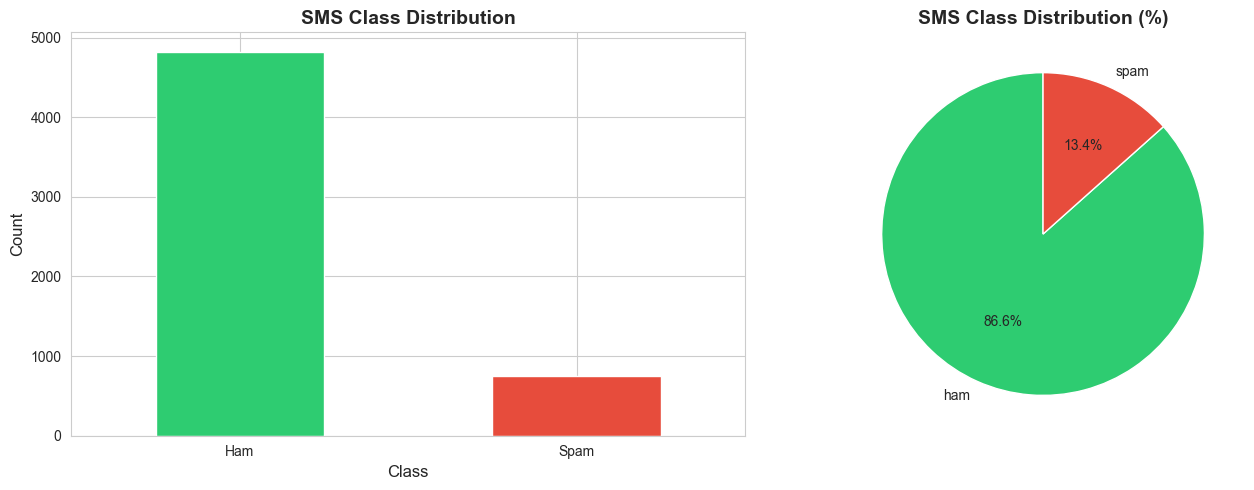

In [7]:
# Class distribution
print("Class Distribution:")
print(df['label'].value_counts())
print("\nClass Distribution (Percentage):")
print(df['label'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['label'].value_counts().plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('SMS Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xticklabels(['Ham', 'Spam'], rotation=0)

# Pie chart
df['label'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                                 colors=['#2ecc71', '#e74c3c'], startangle=90)
ax2.set_title('SMS Class Distribution (%)', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [8]:
# Add message length and word count features
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(str(x).split()))

# Display statistics by class
print("Message Length Statistics by Class:")
print(df.groupby('label')['message_length'].describe())

print("\nWord Count Statistics by Class:")
print(df.groupby('label')['word_count'].describe())

Message Length Statistics by Class:
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.482487  58.440652   2.0   33.0   52.0   93.0  910.0
spam    747.0  138.670683  28.873603  13.0  133.0  149.0  157.0  223.0

Word Count Statistics by Class:
        count       mean        std  min   25%   50%   75%    max
label                                                            
ham    4825.0  14.310259  11.517945  1.0   7.0  11.0  19.0  171.0
spam    747.0  23.911647   5.780174  2.0  22.0  25.0  28.0   35.0


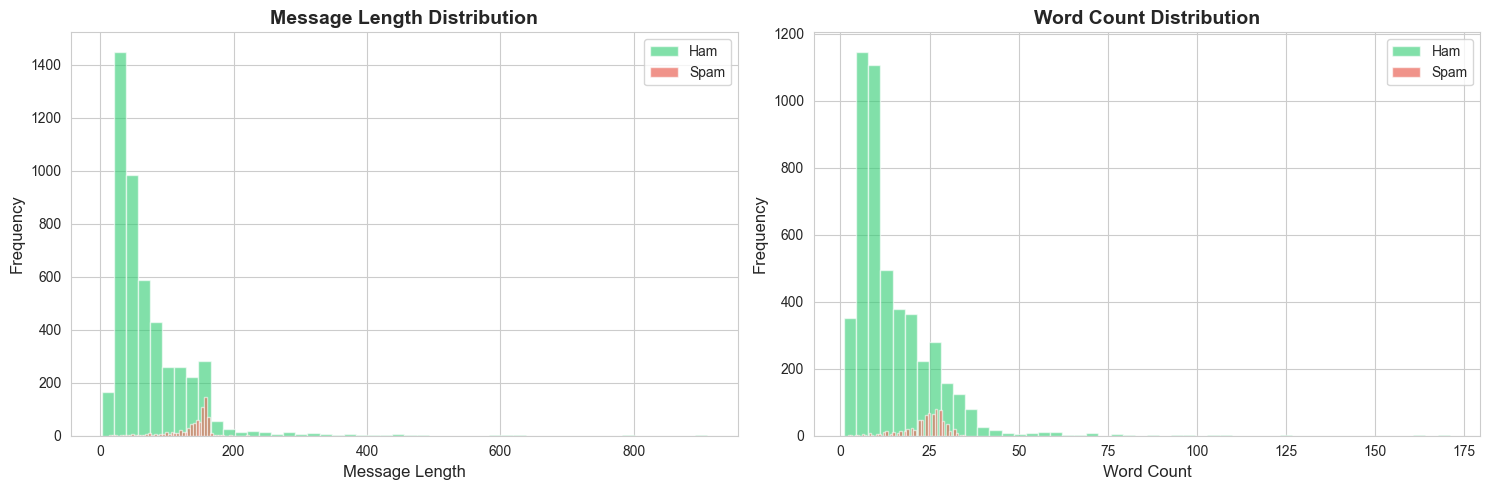

In [9]:
# Visualize message length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Message length distribution
df[df['label']=='ham']['message_length'].hist(bins=50, alpha=0.6, label='Ham', ax=ax1, color='#2ecc71')
df[df['label']=='spam']['message_length'].hist(bins=50, alpha=0.6, label='Spam', ax=ax1, color='#e74c3c')
ax1.set_title('Message Length Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Message Length', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend()

# Word count distribution
df[df['label']=='ham']['word_count'].hist(bins=50, alpha=0.6, label='Ham', ax=ax2, color='#2ecc71')
df[df['label']=='spam']['word_count'].hist(bins=50, alpha=0.6, label='Spam', ax=ax2, color='#e74c3c')
ax2.set_title('Word Count Distribution', fontsize=14, fontweight='bold')
ax2.set_xlabel('Word Count', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

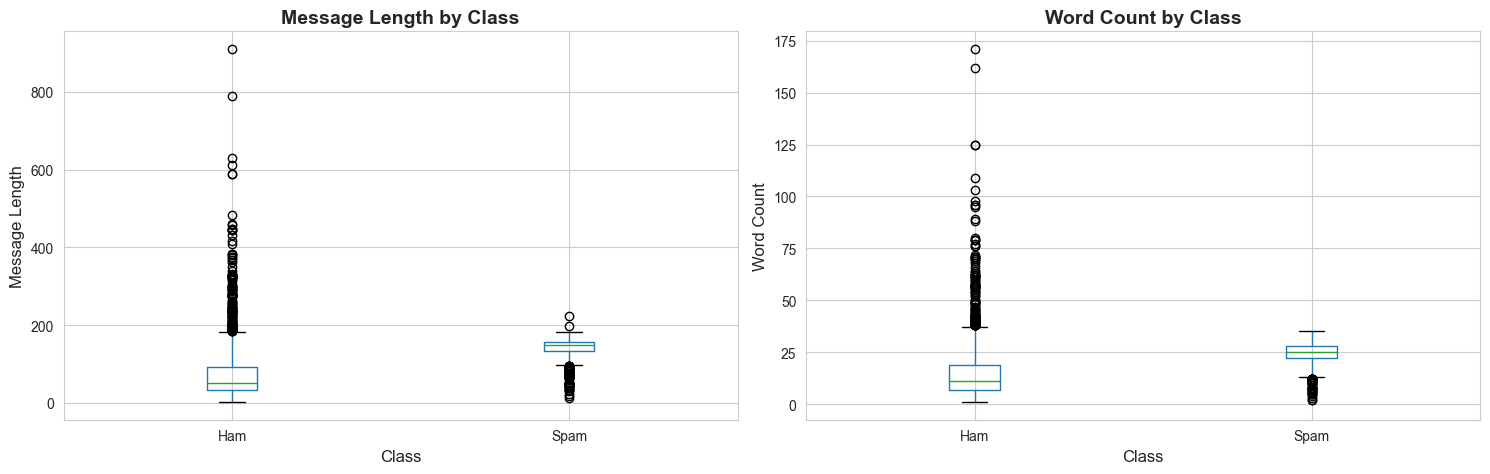

In [10]:
# Box plots for message length and word count
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

df.boxplot(column='message_length', by='label', ax=ax1)
ax1.set_title('Message Length by Class', fontsize=14, fontweight='bold')
ax1.set_xlabel('Class', fontsize=12)
ax1.set_ylabel('Message Length', fontsize=12)
plt.sca(ax1)
plt.xticks([1, 2], ['Ham', 'Spam'])

df.boxplot(column='word_count', by='label', ax=ax2)
ax2.set_title('Word Count by Class', fontsize=14, fontweight='bold')
ax2.set_xlabel('Class', fontsize=12)
ax2.set_ylabel('Word Count', fontsize=12)
plt.sca(ax2)
plt.xticks([1, 2], ['Ham', 'Spam'])

plt.suptitle('')
plt.tight_layout()
plt.show()

In [11]:
# Sample messages from each class
print("Sample HAM messages:")
print("="*80)
for msg in df[df['label']=='ham']['message'].head(3):
    print(f"- {msg}\n")

print("\nSample SPAM messages:")
print("="*80)
for msg in df[df['label']=='spam']['message'].head(3):
    print(f"- {msg}\n")

Sample HAM messages:
- Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

- Ok lar... Joking wif u oni...

- U dun say so early hor... U c already then say...


Sample SPAM messages:
- Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

- FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

- WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.



# **5. Data Preprocessing**

Melakukan preprocessing untuk membersihkan dan mempersiapkan data sebelum modeling.

In [12]:
# Remove duplicates
print(f"Shape before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

# Reset index
df = df.reset_index(drop=True)

Shape before removing duplicates: (5572, 4)
Shape after removing duplicates: (5169, 4)


In [13]:
def clean_text(text):
    """
    Clean and normalize text data
    """
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove phone numbers
    text = re.sub(r'\d{5,}', '', text)
    
    # Remove special characters but keep spaces
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply text cleaning
print("Cleaning text messages...")
df['message_clean'] = df['message'].apply(clean_text)

# Display comparison
print("\nExample of text cleaning:")
print("="*80)
for i in range(3):
    print(f"Original: {df['message'].iloc[i]}")
    print(f"Cleaned:  {df['message_clean'].iloc[i]}")
    print("-"*80)

Cleaning text messages...

Example of text cleaning:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Cleaned:  go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
--------------------------------------------------------------------------------
Original: Ok lar... Joking wif u oni...
Cleaned:  ok lar joking wif u oni
--------------------------------------------------------------------------------
Original: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
Cleaned:  free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to to receive entry questionstd txt ratetcs apply over18s
--------------------------------------------------------------------------------


In [14]:
# Encode labels
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

print("Label encoding:")
print("ham -> 0")
print("spam -> 1")
print("\nEncoded label distribution:")
print(df['label_encoded'].value_counts())

Label encoding:
ham -> 0
spam -> 1

Encoded label distribution:
label_encoded
0    4516
1     653
Name: count, dtype: int64


In [15]:
# Save preprocessed data
output_path = 'sms_spam_preprocessing.csv'
df.to_csv(output_path, index=False)
print(f"Preprocessed data saved to: {output_path}")
print(f"Final dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Preprocessed data saved to: sms_spam_preprocessing.csv
Final dataset shape: (5169, 6)
Columns: ['label', 'message', 'message_length', 'word_count', 'message_clean', 'label_encoded']


## Summary

Preprocessing yang telah dilakukan:
1. Menghapus data duplikat
2. Membersihkan teks (lowercase, remove URLs, emails, phone numbers)
3. Menghitung panjang pesan dan jumlah kata
4. Encoding label (ham=0, spam=1)
5. Menyimpan data yang telah dipreprocess

Data siap untuk tahap pemodelan machine learning!